# Homework2 - Kick Starter


## Day 1 

## About this project

### Context
I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them... But I hope you can!

### Content
You'll find most useful data for project analysis. Columns are self explanatory except:

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

### Acknowledgements
Data are collected from Kickstarter Platform

usd conversion (usd_pledged_real and usd_goal_real columns) were generated from convert ks pledges to usd script done by tonyplaysguitar

### Inspiration
I hope to see great projects, and why not a model to predict if a project will be successful before it is released? :)


### (1) Undertand data

In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
#df_2016 = pd.read_csv("data/ks-projects-201612.csv", encoding = "ISO-8859-1" )
#df_2016.describe()

df_2018 = pd.read_csv("data/ks-projects-201801.csv")
#df_2018 = pd.read_csv("data/sample.csv")
df_2018["day_diff"] = (pd.to_datetime(df_2018["deadline"]) - pd.to_datetime(df_2018["launched"])).dt.days
df_2018['succeeded'] = (df_2018['state'] == "successful")

success= df_2018[df_2018['succeeded']]
failed = df_2018[df_2018['succeeded'] != True]
# canceled = df_2018[df_2018['state'].str.contains('canceled')]

df_2018.describe()




,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,day_diff
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,33.481122
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,65.909172
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,29.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,29.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,36.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,16738.000000


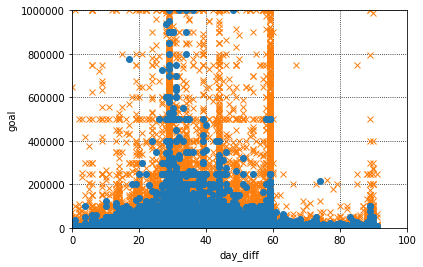

In [98]:
fx = failed["day_diff"].values
fy = failed["usd_goal_real"].values
plt.plot(fx, fy, 'x',color='C1', label='Fail')

sx = success["day_diff"].values
sy = success["usd_goal_real"].values
plt.plot(sx, sy, 'o', color='C0', label='Success')

#cx = canceled["day_diff"].values
#cy = canceled["usd_goal_real"].values
# plt.plot(cx, cy, '^',color='C2', label='Cancel')

plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('goal')
plt.xlabel('day_diff')
plt.xlim([0,100])
plt.ylim([0,1000000])
plt.show()

In [101]:
y = df_2018["succeeded"].values
# X = df_2018[["day_diff"]].values
X = df_2018[["day_diff", "usd_goal_real"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)


# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

/Users/takahiro.a.ono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


w0 = 3874.691, w1 = 65.246, w2 = -454.432


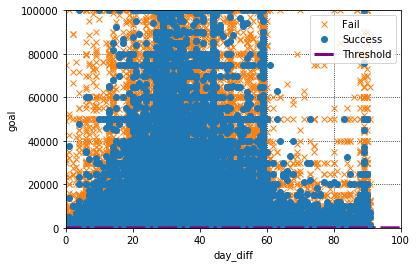

In [102]:
x1, x2 = df_2018["day_diff"].values, df_2018["usd_goal_real"].values 

# データをプロット
fx = failed["day_diff"].values
fy = failed["usd_goal_real"].values
plt.plot(fx, fy, 'x',color='C1', label='Fail')

sx = success["day_diff"].values
sy = success["usd_goal_real"].values
plt.plot(sx, sy, 'o', color='C0', label='Success')


#cx = canceled["day_diff"].values
#cy = canceled["usd_goal_real"].values
# plt.plot(cx, cy, '^',color='C2', label='Cancel')

# 境界線をプロットして表示
# 紫：境界線
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')


plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('goal')
plt.xlabel('day_diff')
plt.xlim([0,100])
plt.ylim([0,100000])
plt.show()
